<a href="https://colab.research.google.com/github/Studies-Tus/Maize-Yield-App/blob/main/MaizePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install xgboost --quiet

In [16]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# STEP 2: Load dataset
file_path = '/content/sample_data/Nigeria_Maize_Dataset.csv'
df = pd.read_csv(file_path)

# STEP 3: Inspect the data
print(df.head())
print(df.describe())
print(df.isnull().sum())

# STEP 4: Preprocess data
# Drop location columns if not needed
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

# Define features (X) and target (y)
X = df[['Rainfall (mm)', 'Temperature (°C)', 'Soil_pH', 'Soil_Clay (%)',
        'Soil_Silt (%)', 'Soil_Sand (%)', 'Fertilizer_Use (kg/ha)', 'Planting_Density (plants/m²)']]

y = df['Maize_Yield (t/ha)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# STEP 6: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# STEP 7: Train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R² Score: {r2:.3f}")


  State  Year  Latitude  Longitude  Maize_Yield (t/ha)  Rainfall (mm)  \
0  Abia  1995  4.300000   3.300000            3.097768    1494.552227   
1  Abia  1996  4.555556   3.611111            1.655471    1399.855256   
2  Abia  1997  4.811111   3.922222            2.509813    1025.213504   
3  Abia  1998  5.066667   4.233333            1.903244     622.469308   
4  Abia  1999  5.322222   4.544444            1.690125     868.677359   

   Temperature (°C)   Soil_pH  Soil_Clay (%)  Soil_Silt (%)  Soil_Sand (%)  \
0         26.403254  6.574815      27.845988      23.206054      56.237637   
1         31.907670  6.999872      36.527933      25.287453      74.020187   
2         31.176834  5.395303      35.773085      15.300929      61.298455   
3         29.926067  5.522595      44.737680      10.418899      52.232723   
4         31.655236  7.137069      18.851829      11.643433      43.993352   

   Fertilizer_Use (kg/ha)  Planting_Density (plants/m²)  
0              112.738734         

In [17]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, rmse, mae, r2])

result_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R² Score"])
print(result_df)


               Model      RMSE       MAE  R² Score
0  Linear Regression  0.904921  0.776552 -0.053929
1      Random Forest  0.965807  0.844223 -0.200525
2            XGBoost  1.079245  0.949111 -0.499097


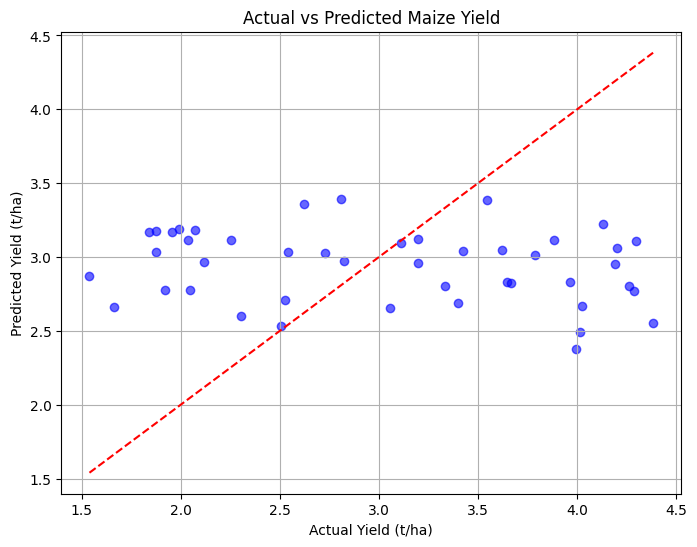

In [18]:
import matplotlib.pyplot as plt

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Yield (t/ha)")
plt.ylabel("Predicted Yield (t/ha)")
plt.title("Actual vs Predicted Maize Yield")
plt.grid(True)
plt.show()

In [19]:
import joblib
joblib.dump(best_model, "maize_yield_model.pkl")

['maize_yield_model.pkl']

In [20]:
 joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [21]:
import joblib
scaler = joblib.load('scaler.pkl')
print("Expected input features:", scaler.n_features_in_)

Expected input features: 8


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

# Scale
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save
joblib.dump(model, 'maize_yield_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [23]:
import joblib
scaler = joblib.load('scaler.pkl')
print("Expected input features:", scaler.n_features_in_)

Expected input features: 8
